## Importing required libraries

In [ ]:
pip install pycaret-ts-alpha

     |████████████████████████████████| 498 kB 5.2 MB/s 
     |████████████████████████████████| 15.6 MB 56.6 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 9.5 MB 41.4 MB/s 
     |████████████████████████████████| 114 kB 53.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.7 MB 43.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 51.5 MB/s 
     |████████████████████████████████| 167 kB 69.0 MB/s 
     |████████████████████████████████| 1.4 MB 55.6 MB/s 
     |████████████████████████████████| 261 kB 69.3 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 6.2 MB 21.7 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |███████████████████

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638094 sha256=0c54d7f858669ad5e9e9c0337fed802ac4498f2be06c9645ce93b6e8220ff9ac
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import pandas as pd
from prophet import Prophet

from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
import yfinance as yf

## Taking careerpoint stock data ..... why career point ? because I am placed here

In [ ]:
data = yf.download(tickers='CAREERP.NS', period='1000d', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-24,130.649994,132.199997,125.199997,126.199997,119.837997,181899
2018-01-25,125.099998,133.000000,125.000000,129.100006,122.591820,110829
2018-01-29,129.000000,131.199997,125.099998,125.550003,119.220787,46217
2018-01-30,124.050003,124.599998,121.050003,121.949997,115.802261,78385
2018-01-31,121.000000,124.650002,121.000000,122.849998,116.656883,45531
...,...,...,...,...,...,...
2022-02-07,136.399994,136.399994,133.050003,134.050003,134.050003,9519
2022-02-08,133.050003,134.800003,131.000000,132.149994,132.149994,17096
2022-02-09,134.000000,134.500000,132.699997,133.600006,133.600006,7635


## dropping irrelevent columns

In [ ]:
data.drop(['Open',	'High',	'Low',	'Close','Volume'], axis=1, inplace=True)

In [ ]:
data.head()

,Adj Close
Date,
2018-01-24,119.837997
2018-01-25,122.591820
2018-01-29,119.220787
2018-01-30,115.802261
2018-01-31,116.656883


## Resetting the date column

In [ ]:
data.reset_index(level=0, inplace=True)

In [ ]:
data

,Date,Adj Close
0,2018-01-24,119.837997
1,2018-01-25,122.591820
2,2018-01-29,119.220787
3,2018-01-30,115.802261
4,2018-01-31,116.656883
...,...,...
995,2022-02-07,134.050003
996,2022-02-08,132.149994
997,2022-02-09,133.600006
998,2022-02-10,133.199997


## Renaming data columns for fitting prophet model 

In [ ]:
data2 = data.rename({'Date': 'ds', 'Adj Close': 'y'}, axis=1)

In [ ]:
data2

,ds,y
0,2018-01-24,119.837997
1,2018-01-25,122.591820
2,2018-01-29,119.220787
3,2018-01-30,115.802261
4,2018-01-31,116.656883
...,...,...
995,2022-02-07,134.050003
996,2022-02-08,132.149994
997,2022-02-09,133.600006
998,2022-02-10,133.199997


In [ ]:
train = data2[(data2['ds']>= '2018-01-23'	) & ( data2['ds']<='2021-04-27')]

In [ ]:
train

,ds,y
0,2018-01-24,119.837997
1,2018-01-25,122.591820
2,2018-01-29,119.220787
3,2018-01-30,115.802261
4,2018-01-31,116.656883
...,...,...
795,2021-04-20,119.300003
796,2021-04-22,120.550003
797,2021-04-23,119.800003
798,2021-04-26,123.000000


In [ ]:
test = data2[(data2['ds']>'2021-04-27')]

In [ ]:
test

,ds,y
800,2021-04-28,119.050003
801,2021-04-29,119.199997
802,2021-04-30,119.250000
803,2021-05-03,125.099998
804,2021-05-04,125.000000
...,...,...
995,2022-02-07,134.050003
996,2022-02-08,132.149994
997,2022-02-09,133.600006
998,2022-02-10,133.199997


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 800 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      200 non-null    datetime64[ns]
 1   y       200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


## Fitting the model ( 80-20 split)

In [ ]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predicting on unseen data of 200 days

In [ ]:
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-04-28,148.623091,138.326629,158.164949
1,2021-04-29,149.173552,139.511005,159.708155
2,2021-04-30,149.185587,139.431042,159.239079
3,2021-05-03,149.262349,139.175672,158.647391
4,2021-05-04,149.065007,139.848247,158.875625
...,...,...,...,...
195,2022-02-07,111.607844,79.957096,139.505580
196,2022-02-08,111.556199,80.068325,139.562254
197,2022-02-09,112.329992,81.135535,140.647592
198,2022-02-10,112.827154,81.941984,140.759576


## RMSE Calculations

In [ ]:
actual= data2['y'].tail()

In [ ]:
actual

995    134.050003
996    132.149994
997    133.600006
998    133.199997
999    130.449997
Name: y, dtype: float64

In [ ]:
predicted= forecast['yhat'].tail()

In [ ]:
predicted

195    111.607844
196    111.556199
197    112.329992
198    112.827154
199    112.901357
Name: yhat, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(actual, predicted)

In [ ]:
MSE

420.635176596045

In [ ]:
import math

In [ ]:
RMSE = math.sqrt(MSE)

In [ ]:
RMSE

20.509392399484803

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse_val = rmse(np.array(actual), np.array(predicted))
print("rms error is: " + str(rmse_val))

rms error is: 20.509392399484803


## Plotting forecasting values

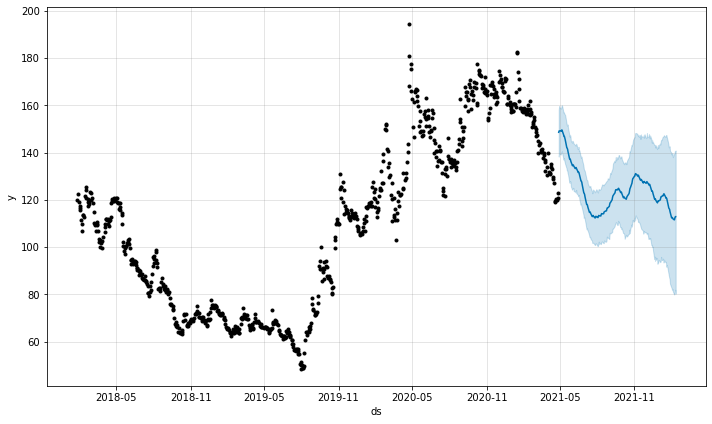

In [ ]:
fig1 = m.plot(forecast)

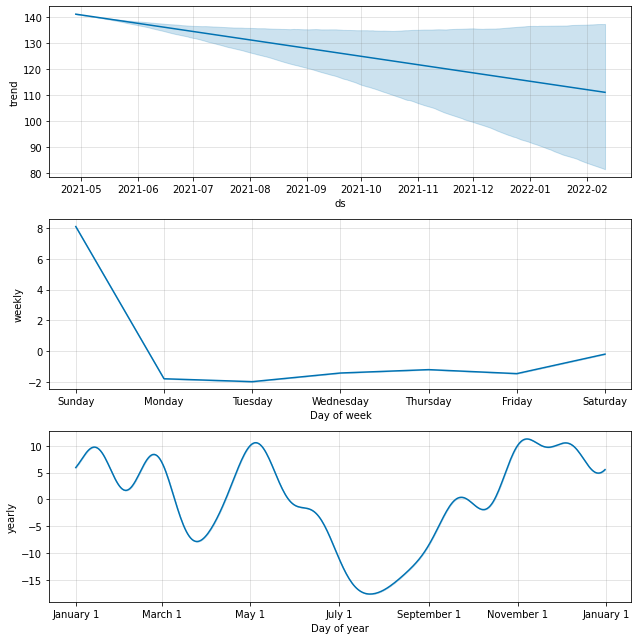

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
plot_plotly(m, forecast)

## Forecast from AR Model

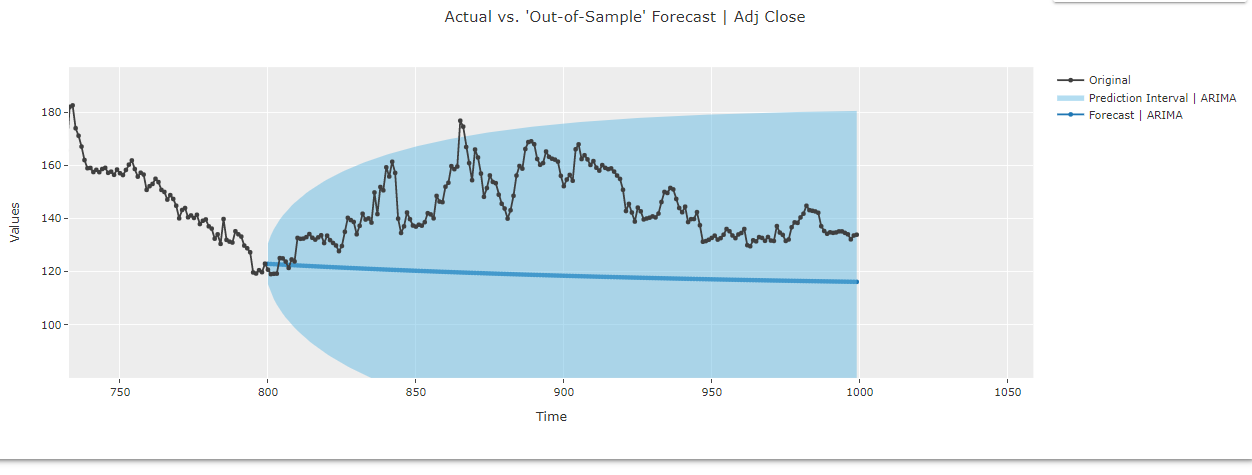